In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from publish import *

# MEAT AND ECONOMIC CORRELATION

In [62]:
production = pd.read_csv("Datathon Data/Meat_Stats_Meat_Production.csv")
stocks = pd.read_csv("Datathon Data/all_stock_and_etfs.csv")

In [63]:
TICKER = "SPY" # We want to track the S&P 500
START = 2001

In [64]:
stocks = stocks[stocks["Ticker_Symbol"] == TICKER]

stocks

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
97478,2024-02-23,509.2700,510.1300,507.1000,507.8500,61321818,SPY
97479,2024-02-22,504.0100,508.4900,503.0200,507.5000,76402535,SPY
97480,2024-02-21,495.4200,497.3700,493.5600,497.2100,59603771,SPY
97481,2024-02-20,497.7200,498.4100,494.4500,496.7600,71736740,SPY
97482,2024-02-16,501.7000,502.8700,498.7500,499.5100,75532928,SPY
...,...,...,...,...,...,...,...
103590,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500,SPY
103591,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500,SPY
103592,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300,SPY
103593,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900,SPY


In [65]:
stocks["Year"] = stocks["Date-Time"].apply(lambda x: int(x.split("-")[0]))
stocks["Month"] = stocks["Date-Time"].apply(lambda x: int(x.split("-")[1]))
stocks["Day"] = stocks["Date-Time"].apply(lambda x: int(x.split("-")[2]))

stocks = stocks.reset_index().drop(["Date-Time", "index"], axis=1)

stocks

,Open,High,Low,Close,Volume,Ticker_Symbol,Year,Month,Day
0,509.2700,510.1300,507.1000,507.8500,61321818,SPY,2024,2,23
1,504.0100,508.4900,503.0200,507.5000,76402535,SPY,2024,2,22
2,495.4200,497.3700,493.5600,497.2100,59603771,SPY,2024,2,21
3,497.7200,498.4100,494.4500,496.7600,71736740,SPY,2024,2,20
4,501.7000,502.8700,498.7500,499.5100,75532928,SPY,2024,2,16
...,...,...,...,...,...,...,...,...,...
6112,138.6250,139.1093,136.7812,137.8750,7431500,SPY,1999,11,5
6113,136.7500,137.3593,135.7656,136.5312,7907500,SPY,1999,11,4
6114,136.0000,136.3750,135.1250,135.5000,7222300,SPY,1999,11,3
6115,135.9687,137.2500,134.5937,134.5937,6516900,SPY,1999,11,2


In [66]:
stock_df = pd.DataFrame(columns=["Time", "Price"] )

for year in range(START, 2025):
    for month in range(1, 13):
        month_stocks = stocks[(stocks["Year"] == year) & (stocks["Month"] == month)]

        if len(month_stocks) == 0:
            continue

        price = month_stocks["Close"].values[-1] # This ensures the price is as close to the first of the month as we can get
        
        stock_df.loc[len(stock_df)] = [(year + (month - 1)/12), price]

stock_df


,Time,Price
0,2001.000000,128.8125
1,2001.083333,137.9300
2,2001.166667,124.6000
3,2001.250000,114.2000
4,2001.333333,127.0500
...,...,...
273,2023.750000,427.3100
274,2023.833333,422.6600
275,2023.916667,459.1000
276,2024.000000,472.6500


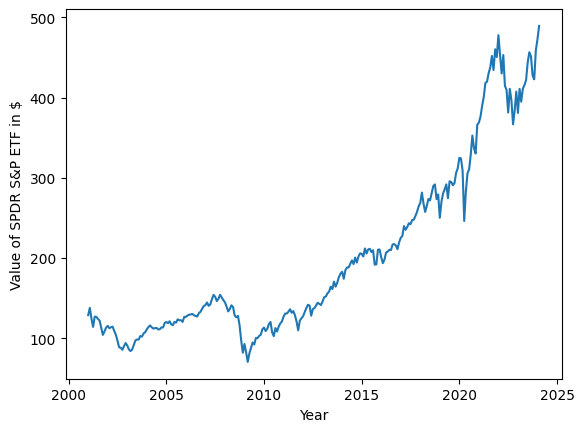

In [67]:
plt.gcf()
plt.plot(stock_df["Time"].values, stock_df["Price"].values)
plt.xlabel("Year")
plt.ylabel("Value of SPDR S&P ETF in $")
plt.show()

In [68]:
# Creating the production df as in MeatDataTrajectory.ipynb
production["Production"] = production["Production"].apply(lambda x: x if type(x) == float else float(x.replace(",", "")))
production["Time"] = production["Year"] + (production["Month"] - 1) / 12
production = production.drop(["Date", "Year", "Month", "Unit", "Type of Meat"], axis=1)

production

,Production,Animal,Commercial or Federally Inspected,Time
0,2189.8,Beef,Commercial,2023.916667
1,2280.9,Beef,Commercial,2023.833333
2,2340.9,Beef,Commercial,2023.750000
3,2149.4,Beef,Commercial,2023.666667
4,2363.5,Beef,Commercial,2023.583333
...,...,...,...,...
13590,NaN,Turkey,Federally Inspected,1921.333333
13591,NaN,Turkey,Federally Inspected,1921.250000
13592,NaN,Turkey,Federally Inspected,1921.166667
13593,NaN,Turkey,Federally Inspected,1921.083333


In [69]:
meats = production["Animal"].unique()
production_type = production["Commercial or Federally Inspected"].unique()

meats, production_type

(array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
        'Other Chicken', 'Turkey'], dtype=object),
 array(['Commercial', 'Federally Inspected'], dtype=object))

In [70]:
production_dfs = {}

for meat in meats:
    for prod in production_type:
        temp_df = production[(production["Animal"] == meat) & (production["Commercial or Federally Inspected"] == prod)].reset_index().drop(["index"], axis=1)

        if len(temp_df) == 0:
            continue

        # This code block explained in MeatDataScraping.ipynb
        for i in range(1, len(temp_df) - 1):
            if temp_df.at[i, "Production"] > 2 * temp_df.at[i - 1, "Production"]:
                if pd.isnull(temp_df.at[i + 1, "Production"]) and pd.isnull(temp_df.at[i + 2, "Production"]):
                    temp_df.at[i + 2, "Production"] = temp_df.at[i, "Production"] / 3
                    temp_df.at[i + 1, "Production"] = temp_df.at[i, "Production"] / 3
                    temp_df.at[i, "Production"] /=3

        # Turkey, Federally Inspected dataset has an error
        if (meat, prod) == ("Turkey", "Federally Inspected"):
            temp_df = temp_df.drop(temp_df[temp_df["Time"] < 1940].index)

        # This information is held in the name of the dataframe
        temp_df = temp_df.drop(["Animal", "Commercial or Federally Inspected"], axis=1)

        production_dfs[f"{meat}, {prod}"] = temp_df

In [71]:
production_dfs_animal = {}

for label in production_dfs:
    animal, _ = label.split(",")

    if animal not in production_dfs_animal:
        production_dfs_animal[animal] = production_dfs[label][production_dfs[label]["Time"] >= START]
    else:
        production_dfs_animal[animal].loc[:, "Production"] = production_dfs_animal[animal]["Production"].values + production_dfs[label][production_dfs[label]["Time"] >= START]["Production"].values 

In [72]:
total_df = []

for animal in production_dfs_animal:
    if len(total_df) == 0:
        total_df = production_dfs_animal[animal][production_dfs_animal[animal]["Time"] >= START]
    else:
        total_df.loc[:, "Production"] = total_df["Production"].values + production_dfs_animal[animal][production_dfs_animal[animal]["Time"] >= START]["Production"].values

total_df

,Production,Time
0,13156.6,2023.916667
1,13685.6,2023.833333
2,14154.8,2023.750000
3,12994.7,2023.666667
4,13939.4,2023.583333
...,...,...
271,11023.0,2001.333333
272,9984.9,2001.250000
273,10513.3,2001.166667
274,9574.1,2001.083333


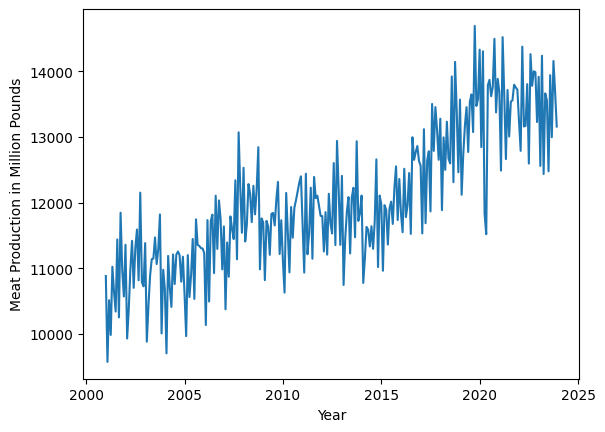

In [73]:
plt.gcf()
plt.plot(total_df["Time"], total_df["Production"])
plt.xlabel("Year")
plt.ylabel("Meat Production in Million Pounds")
plt.show()

In [74]:
# Finally, visualising and calculating the correlation between stock price (which we assume to model economic growth of the US) and meat production
stocks_and_meat = pd.merge(total_df, stock_df, on="Time")

stocks_and_meat

,Production,Time,Price
0,13156.6,2023.916667,459.1000
1,13685.6,2023.833333,422.6600
2,14154.8,2023.750000,427.3100
3,12994.7,2023.666667,451.1900
4,13939.4,2023.583333,456.4800
...,...,...,...
271,11023.0,2001.333333,127.0500
272,9984.9,2001.250000,114.2000
273,10513.3,2001.166667,124.6000
274,9574.1,2001.083333,137.9300


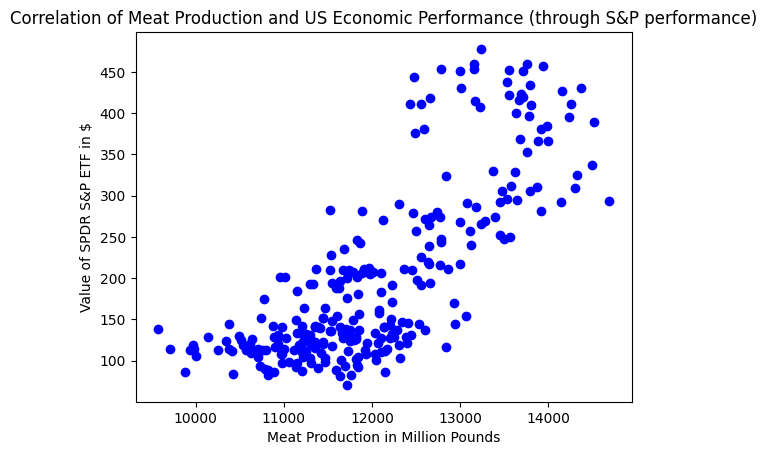

In [75]:
xs = stocks_and_meat["Production"].values
ys = stocks_and_meat["Price"].values

plt.gcf()
plt.plot(xs, ys, "bo")
plt.xlabel("Meat Production in Million Pounds")
plt.ylabel("Value of SPDR S&P ETF in $")
plt.title("Correlation of Meat Production and US Economic Performance (through S&P performance)")
plt.show()

In [76]:
correlation_coef = np.corrcoef(xs, ys)[0, 1]

correlation_coef

0.7779620613140048

#### 0.78 is a VERY high correlation coefficient